# Life-Cycle Labor Supply of Couples

Solves and simulates a $T$-period labor supply model with two-earner couples. <br>
**Motivated** by the study “Are Marriage-Related Taxes and Social Security Benefits Holding Back Female Labor Supply?” by Borella et al. (forthcoming). <br>
**Goal** is to replicate effects of individual vs. joint taxation.

For simplicity, couples cannot divorce nor save.

The **Bellman equation** and the recursive formulation of our simple model is 
$$
\begin{align*}
V_{t}(K_{1,t},K_{2,t}) & =\max_{h_{1,t},h_{2,t}}U(c_{t},h_{1,t},h_{2,t})+\beta V_{t+1}(K_{1,t+1},K_{2,t+1})\\
c_{t} & =\sum_{j=1}^{2}w_{j,t}h_{j,t}-T(w_{1,t}h_{1,t},w_{2,t}h_{2,t})\\
\log w_{j,t} & =\alpha_{j,0}+\alpha_{j,1}K_{j,t},\;j\in\{1,2\}\\
K_{j,t+1} & =(1-\delta)K_{j,t}+h_{j,t},\;j\in\{1,2\}
\end{align*}
$$

**Preferences** are sum of individuals
$$
U(c_{t},h_{1,t},h_{2,t})=2\frac{(c_{t}/2)^{1+\eta}}{1+\eta}-\rho_{1}\frac{h_{1,t}^{1+\gamma}}{1+\gamma}-\rho_{2}\frac{h_{2,t}^{1+\gamma}}{1+\gamma}
$$

**Taxes** are on the household level
$$
T(Y_{1},Y_{2})=(1-\lambda(Y_{1}+Y_{2})^{-\tau})\cdot(Y_{1}+Y_{2})
$$

**Terminal period:** There are no bequests such that
$$
V_{T}(K_{1,T},K_{2,T})  =\max_{h_{1,T},h_{2,T}}U(c_{T},h_{1,T},h_{2,T})
$$

## Setup

In [45]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Consumption-Saving Model

In [46]:
# load local model file and initialize model class
from DynHouseholdLaborModel import DynHouseholdLaborModelClass
model = DynHouseholdLaborModelClass()

par = model.par
sol = model.sol
sim = model.sim

In [47]:
model.solve()

/Users/bruger/Desktop/HouseholdBehaviorCourse 2/06/DynHouseholdLaborModel.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  rate = 1.0 - par.tax_scale_i*(income**(-par.tax_pow_i))
/Users/bruger/Desktop/HouseholdBehaviorCourse 2/06/DynHouseholdLaborModel.py:264: RuntimeWarning: invalid value encountered in double_scalars
  return rate*income
/Users/bruger/Desktop/HouseholdBehaviorCourse 2/06/DynHouseholdLaborModel.py:285: RuntimeWarning: divide by zero encountered in double_scalars
  util_1 = ((Q/2))**(1.0-par.eta) / (1.0-par.eta) - rho1*(total1)**(1.0+par.gamma) / (1.0+par.gamma) - par.rho_21*kids*(home1)**par.upsilon
/Users/bruger/Desktop/HouseholdBehaviorCourse 2/06/DynHouseholdLaborModel.py:286: RuntimeWarning: divide by zero encountered in double_scalars
  util_2 = ((Q/2))**(1.0-par.eta) / (1.0-par.eta) - rho2*(total2)**(1.0+par.gamma) / (1.0+par.gamma) + par.rho_22*kids*(home2)**par.upsilon


In [48]:
t = 4

In [49]:
print(model.sol.l1[t,1,0,0])
print(model.sol.h1[t,1,0,0])
print(model.sol.l2[t,1,0,0])
print(model.sol.h2[t,1,0,0])
print(model.sol.l1[t,1,0,0]+model.sol.h1[t,1,0,0])
print(model.sol.l2[t,1,0,0]+model.sol.h2[t,1,0,0])


1.0535094540669856
0.8507883656692735
0.590148444298032
1.0289869935963372
1.904297819736259
1.6191354378943692


In [50]:
print(model.sol.l1[t,0,0,0])
print(model.sol.h1[t,0,0,0])
print(model.sol.l2[t,0,0,0])
print(model.sol.h2[t,0,0,0])
print(model.sol.l1[t,0,0,0]+model.sol.h1[t,0,0,0])
print(model.sol.l2[t,0,0,0]+model.sol.h2[t,0,0,0])

1.1410822059089385
0.8224289372367317
1.0873427108839437
0.8502077590801875
1.9635111431456702
1.9375504699641313


In [51]:
print(model.sol.V.shape)

(10, 2, 20, 20)


# Simulation

With the solution at hand we can now simulate `simN` synthetic individuals for `simT` periods. We do so by initializing all state-variables in the first period and simulate forwards. 

Initial human capital of both members are the state variables in our model, and we start by initilizing all individuals with no human capital `sim.k1_init=np.zeros(par.simN)` and  `sim.k2_init=np.zeros(par.simN)`. <br>

We then loop forward using the solution:
$$
\begin{align}
h_{1,i,t} &= h_{1,t}^{\star}(k_{1,i,t},k_{2,i,t}) \\
h_{2,i,t} &= h_{2,t}^{\star}(k_{1,i,t},k_{2,i,t}) \\
k_{1,i,t+1} &= (1-\delta)k_{1,i,t} + h_{1,i,t}\\
k_{2,i,t+1} &= (1-\delta)k_{2,i,t} + h_{2,i,t}\\
\end{align}
$$


In [52]:
#sim.k1_init = 8.0*np.zeros(par.simN)
model.simulate()

In [53]:
rel_l = np.mean(getattr(sim,'l1'),axis=0) / np.mean(getattr(sim,'l2'),axis=0) 
rel_h = np.mean(getattr(sim,'h1'),axis=0) / np.mean(getattr(sim,'h2'),axis=0) 

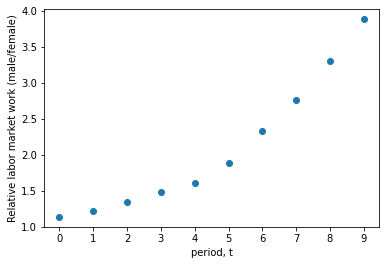

In [54]:
fig, ax = plt.subplots()
ax.scatter(range(par.simT),rel_l,label='Simulated')
ax.set(xlabel='period, t',ylabel='Relative labor market work (male/female)',xticks=range(par.simT));

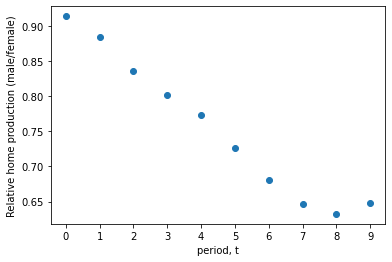

In [55]:
fig, ax = plt.subplots()
ax.scatter(range(par.simT),rel_h,label='Simulated')
ax.set(xlabel='period, t',ylabel='Relative home production (male/female)',xticks=range(par.simT));

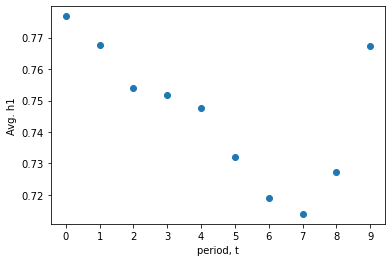

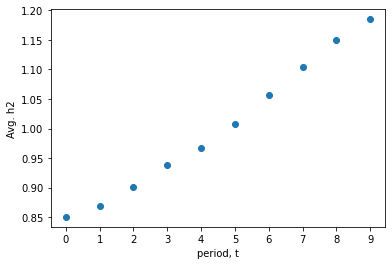

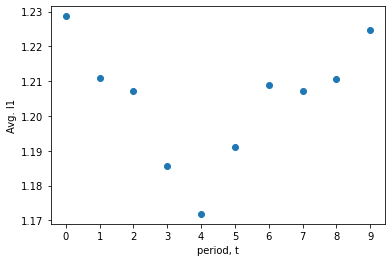

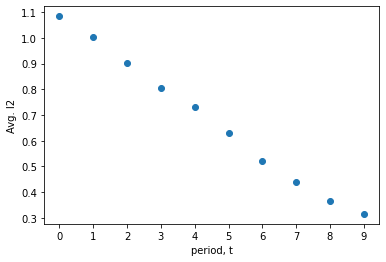

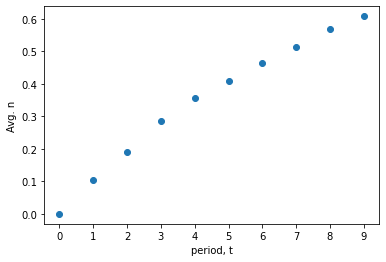

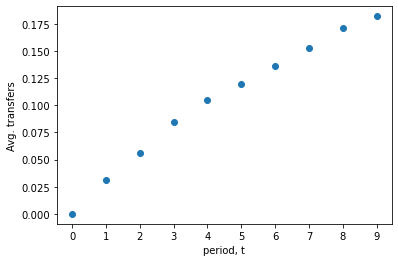

In [56]:

for var in ('h1','h2','l1','l2','n','transfers'):
    fig, ax = plt.subplots()
    ax.scatter(range(par.simT),np.mean(getattr(sim,var),axis=0),label='Simulated')
    ax.set(xlabel='period, t',ylabel=f'Avg. {var}',xticks=range(par.simT));

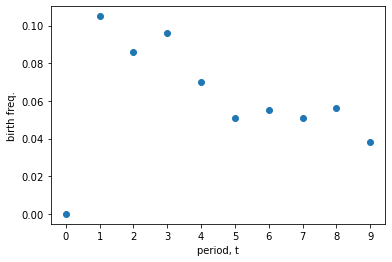

In [57]:
# birth
birth = np.zeros(sim.n.shape,dtype=np.int_)
birth[:,1:] = (sim.n[:,1:] - sim.n[:,:-1]) > 0
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.mean(birth,axis=0))
ax.set(xlabel='period, t',ylabel=f'birth freq.',xticks=range(par.simT));

In [58]:
# time since birth
periods = np.tile([t for t in range(par.simT)],(par.simN,1))
time_of_birth = np.max(periods * birth, axis=1)

I = time_of_birth>0
time_of_birth[~I] = -1000 # never as a child
time_of_birth = np.transpose(np.tile(time_of_birth , (par.simT,1)))

time_since_birth = periods - time_of_birth

In [59]:
# calculate average outcome across time since birth
min_time = -8
max_time = 8
event_grid = np.arange(min_time,max_time+1)

event_hours_h_1 = np.nan + np.zeros(event_grid.size)
for t,time in enumerate(event_grid):
    event_hours_h_1[t] = np.mean(sim.h1[time_since_birth==time])

event_hours_h_2 = np.nan + np.zeros(event_grid.size)
for t,time in enumerate(event_grid):
    event_hours_h_2[t] = np.mean(sim.h2[time_since_birth==time])

# relative to period before birth
event_hours_rel_h_1 = event_hours_h_1 - event_hours_h_1[event_grid==-1]
event_hours_rel_h_2 = event_hours_h_2 - event_hours_h_2[event_grid==-1]

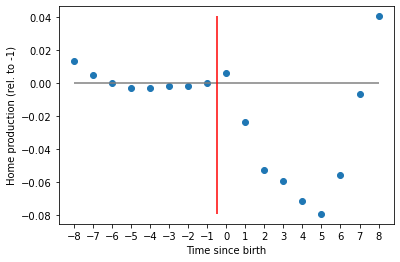

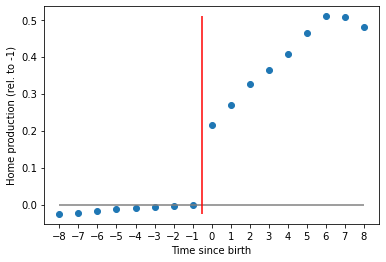

In [60]:
fig, ax = plt.subplots()
ax.scatter(event_grid,event_hours_rel_h_1)
ax.hlines(y=0,xmin=event_grid[0],xmax=event_grid[-1],color='gray')
ax.vlines(x=-0.5,ymin=np.nanmin(event_hours_rel_h_1),ymax=np.nanmax(event_hours_rel_h_1),color='red')
ax.set(xlabel='Time since birth',ylabel=f'Home production (rel. to -1)',xticks=event_grid);

fig, ax = plt.subplots()
ax.scatter(event_grid,event_hours_rel_h_2)
ax.hlines(y=0,xmin=event_grid[0],xmax=event_grid[-1],color='gray')
ax.vlines(x=-0.5,ymin=np.nanmin(event_hours_rel_h_2),ymax=np.nanmax(event_hours_rel_h_2),color='red')
ax.set(xlabel='Time since birth',ylabel=f'Home production (rel. to -1)',xticks=event_grid);

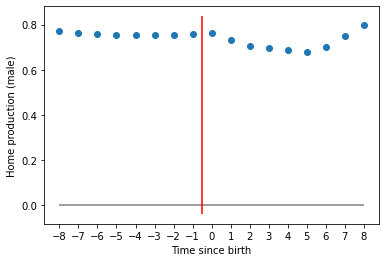

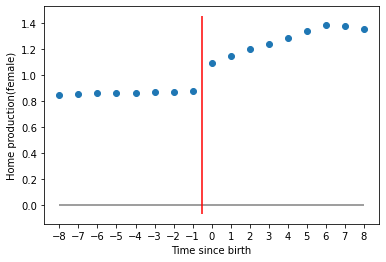

In [61]:
fig, ax = plt.subplots()
ax.scatter(event_grid,event_hours_h_1)
ax.hlines(y=0,xmin=event_grid[0],xmax=event_grid[-1],color='gray')
ax.vlines(x=-0.5,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],color='red')
ax.set(xlabel='Time since birth',ylabel=f'Home production (male)',xticks=event_grid)

fig, ax = plt.subplots()
ax.scatter(event_grid,event_hours_h_2)
ax.hlines(y=0,xmin=event_grid[0],xmax=event_grid[-1],color='gray')
ax.vlines(x=-0.5,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],color='red')
ax.set(xlabel='Time since birth',ylabel=f'Home production(female)',xticks=event_grid);

In [62]:
# calculate average outcome across time since birth
min_time = -8
max_time = 8
event_grid = np.arange(min_time,max_time+1)

event_hours_l_1 = np.nan + np.zeros(event_grid.size)
for t,time in enumerate(event_grid):
    event_hours_l_1[t] = np.mean(sim.l1[time_since_birth==time])

event_hours_l_2 = np.nan + np.zeros(event_grid.size)
for t,time in enumerate(event_grid):
    event_hours_l_2[t] = np.mean(sim.l2[time_since_birth==time])

# relative to period before birth
event_hours_rel_l_1 = event_hours_l_1 - event_hours_l_1[event_grid==-1]
event_hours_rel_l_2 = event_hours_l_2 - event_hours_l_2[event_grid==-1]

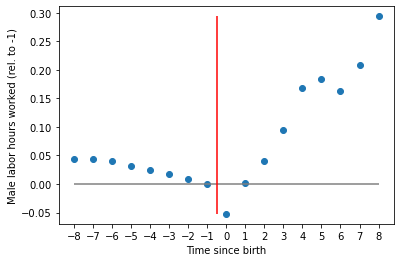

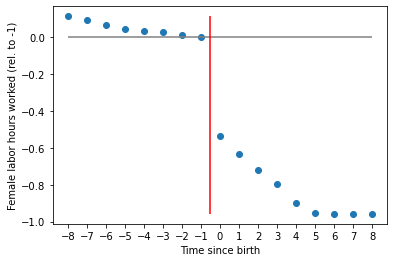

In [63]:
fig, ax = plt.subplots()
ax.scatter(event_grid,event_hours_rel_l_1)
ax.hlines(y=0,xmin=event_grid[0],xmax=event_grid[-1],color='gray')
ax.vlines(x=-0.5,ymin=np.nanmin(event_hours_rel_l_1),ymax=np.nanmax(event_hours_rel_l_1),color='red')
ax.set(xlabel='Time since birth',ylabel=f'Male labor hours worked (rel. to -1)',xticks=event_grid);

fig, ax = plt.subplots()
ax.scatter(event_grid,event_hours_rel_l_2)
ax.hlines(y=0,xmin=event_grid[0],xmax=event_grid[-1],color='gray')
ax.vlines(x=-0.5,ymin=np.nanmin(event_hours_rel_l_2),ymax=np.nanmax(event_hours_rel_l_2),color='red')
ax.set(xlabel='Time since birth',ylabel=f'Female labor hours worked (rel. to -1)',xticks=event_grid);

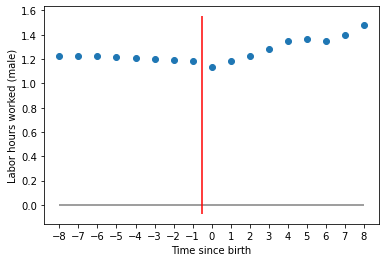

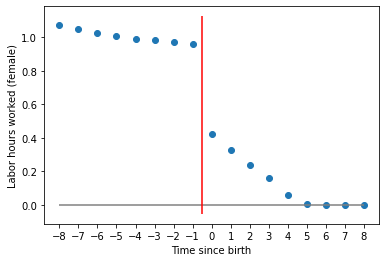

In [64]:
fig, ax = plt.subplots()
ax.scatter(event_grid,event_hours_l_1)
ax.hlines(y=0,xmin=event_grid[0],xmax=event_grid[-1],color='gray')
ax.vlines(x=-0.5,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],color='red')
ax.set(xlabel='Time since birth',ylabel=f'Labor hours worked (male)',xticks=event_grid)

fig, ax = plt.subplots()
ax.scatter(event_grid,event_hours_l_2)
ax.hlines(y=0,xmin=event_grid[0],xmax=event_grid[-1],color='gray')
ax.vlines(x=-0.5,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],color='red')
ax.set(xlabel='Time since birth',ylabel=f'Labor hours worked (female)',xticks=event_grid);

In [70]:
# calculate average outcome across time since birth
min_time = -8
max_time = 8
event_grid = np.arange(min_time,max_time+1)

event_hours_i_1 = np.nan + np.zeros(event_grid.size)
for t,time in enumerate(event_grid):
    event_hours_i_1[t] = np.mean(sim.income1[time_since_birth==time])

event_hours_i_2 = np.nan + np.zeros(event_grid.size)
for t,time in enumerate(event_grid):
    event_hours_i_2[t] = np.mean(sim.income2[time_since_birth==time])

# relative to period before birth
event_hours_rel_i_1 = event_hours_i_1 - event_hours_i_1[event_grid==-1]
event_hours_rel_i_2 = event_hours_i_2 - event_hours_i_2[event_grid==-1]

In [69]:
event_hours_rel_i_1 

array([-3.72535936, -3.73386768, -3.73890865, -3.74164369, -3.74188284,
       -3.74069571, -3.74066714, -3.73884688, -3.73282253, -3.76236662,
       -3.79127039, -3.79780368, -3.81022284, -3.81795766, -3.79461243,
       -3.7454816 , -3.69853116])

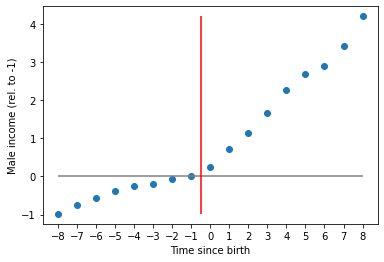

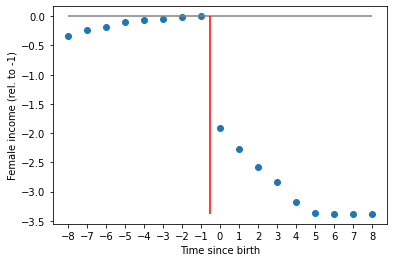

In [71]:
fig, ax = plt.subplots()
ax.scatter(event_grid,event_hours_rel_i_1)
ax.hlines(y=0,xmin=event_grid[0],xmax=event_grid[-1],color='gray')
ax.vlines(x=-0.5,ymin=np.nanmin(event_hours_rel_i_1),ymax=np.nanmax(event_hours_rel_i_1),color='red')
ax.set(xlabel='Time since birth',ylabel=f'Male income (rel. to -1)',xticks=event_grid);

fig, ax = plt.subplots()
ax.scatter(event_grid,event_hours_rel_i_2)
ax.hlines(y=0,xmin=event_grid[0],xmax=event_grid[-1],color='gray')
ax.vlines(x=-0.5,ymin=np.nanmin(event_hours_rel_i_2),ymax=np.nanmax(event_hours_rel_i_2),color='red')
ax.set(xlabel='Time since birth',ylabel=f'Female income (rel. to -1)',xticks=event_grid);

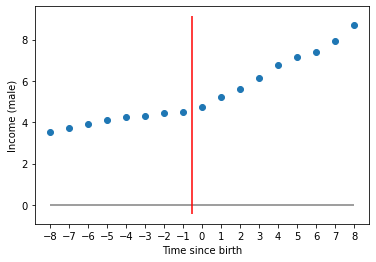

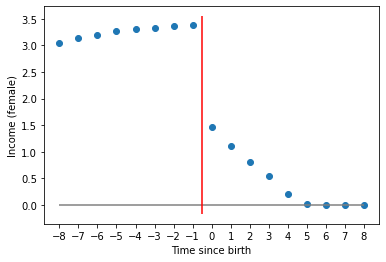

In [68]:
fig, ax = plt.subplots()
ax.scatter(event_grid,event_hours_i_1)
ax.hlines(y=0,xmin=event_grid[0],xmax=event_grid[-1],color='gray')
ax.vlines(x=-0.5,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],color='red')
ax.set(xlabel='Time since birth',ylabel=f'Income (male)',xticks=event_grid)

fig, ax = plt.subplots()
ax.scatter(event_grid,event_hours_i_2)
ax.hlines(y=0,xmin=event_grid[0],xmax=event_grid[-1],color='gray')
ax.vlines(x=-0.5,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],color='red')
ax.set(xlabel='Time since birth',ylabel=f'Income (female)',xticks=event_grid);